In [14]:
#import the useful libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
# Read the data set of "Marketing Analysis" in data.
marketing_data= pd.read_csv("marketing_analysis.csv")

In [16]:
# Printing the data
marketing_data

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45208,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45209,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45210,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45211,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


In [17]:
# Read the file in data without first two rows as it is of no use.
marketing_data = pd.read_csv("marketing_analysis.csv",skiprows = 2)
#print the head of the data frame.
marketing_data.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [18]:
#Data Cleaning
# Drop the customer id as it is of no use.
marketing_data.drop('customerid', axis = 1, inplace = True)


In [19]:
marketing_data

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45207,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45208,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45209,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


In [20]:
#Extract job & Education in newly from "jobedu" column.
marketing_data['job']= marketing_data["jobedu"].apply(lambda x: 
x.split(",")[0])
marketing_data['education']= marketing_data["jobedu"].apply(lambda x: 
x.split(",")[1])
# Drop the "jobedu" column from the dataframe.
marketing_data.drop('jobedu', axis = 1, inplace = True)
# Printing the Dataset
marketing_data

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45207,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45208,72.0,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45209,57.0,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


In [21]:
marketing_data['job']

0          management
1          technician
2        entrepreneur
3         blue-collar
4             unknown
             ...     
45206      technician
45207         retired
45208         retired
45209     blue-collar
45210    entrepreneur
Name: job, Length: 45211, dtype: object

In [22]:
marketing_data['education']

0         tertiary
1        secondary
2        secondary
3          unknown
4          unknown
           ...    
45206     tertiary
45207      primary
45208    secondary
45209    secondary
45210    secondary
Name: education, Length: 45211, dtype: object

In [23]:
# Checking the missing values
marketing_data.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [24]:
marketing_data.isnull()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [25]:
#age value with null()
marketing_data[marketing_data.age.isnull()]

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
161,NaN,60000,47,single,no,no,yes,no,unknown,5,"may, 2017",181 sec,1,-1,0,unknown,no,technician,tertiary
1021,NaN,60000,-500,married,yes,no,yes,no,unknown,7,"may, 2017",78 sec,5,-1,0,unknown,no,technician,secondary
1585,NaN,100000,123,divorced,yes,no,no,no,unknown,8,"may, 2017",306 sec,2,-1,0,unknown,no,management,secondary
3943,NaN,70000,62,married,yes,no,yes,yes,unknown,16,"may, 2017",280 sec,2,-1,0,unknown,no,services,tertiary
5675,NaN,20000,-85,married,yes,no,yes,yes,unknown,26,"may, 2017",118 sec,1,-1,0,unknown,no,blue-collar,primary
6873,NaN,70000,1336,divorced,yes,no,yes,no,unknown,28,"may, 2017",298 sec,5,-1,0,unknown,no,services,secondary
9692,NaN,50000,-162,single,no,no,yes,yes,unknown,6,"jun, 2017",119 sec,1,-1,0,unknown,no,admin.,tertiary
11653,NaN,8000,2562,single,yes,no,no,no,unknown,20,"jun, 2017",489 sec,2,-1,0,unknown,no,unemployed,primary
13417,NaN,20000,452,divorced,yes,no,yes,no,cellular,9,"jul, 2017",96 sec,1,-1,0,unknown,no,blue-collar,primary
14541,NaN,20000,-84,married,yes,no,no,yes,cellular,15,"jul, 2017",1.25 min,4,-1,0,unknown,no,blue-collar,secondary


In [61]:
#age value with not null(~)
marketing_data=marketing_data[~marketing_data.age.isnull()]

In [27]:
#deleting null values from months columns

marketing_data=marketing_data[~marketing_data.month.isnull()]

In [28]:
marketing_data.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [29]:
marketing_data.isnull().sum()

age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [64]:
# Find the mode of month in data
month_mode = marketing_data.month.mode()[0]


In [65]:
# Fill the missing values with mode value of month in data.
marketing_data.month.fillna(month_mode, inplace = True)



In [66]:
# Let's see the null values in the month column.
marketing_data.month.isnull().sum()

0

In [30]:
marketing_data.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [31]:
# Normalize-Let's calculate the percentage of each job status category.
marketing_data.job.value_counts(normalize=True)


blue-collar      0.215281
management       0.209255
technician       0.168051
admin.           0.114397
services         0.091846
retired          0.050043
self-employed    0.034913
entrepreneur     0.032875
unemployed       0.028843
housemaid        0.027359
student          0.020757
unknown          0.006380
Name: job, dtype: float64

In [32]:
# Let's calculate the percentage of each job status category.
marketing_data.job.value_counts()


blue-collar      9718
management       9446
technician       7586
admin.           5164
services         4146
retired          2259
self-employed    1576
entrepreneur     1484
unemployed       1302
housemaid        1235
student           937
unknown           288
Name: job, dtype: int64

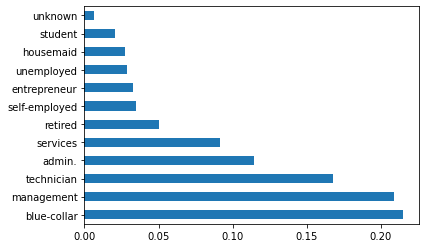

In [33]:
#plot the bar graph of percentage job categories
marketing_data.job.value_counts(normalize=True).plot.barh()
plt.show()


In [34]:
# Dropping the records with age missing in data dataframe.
#marketing_data = marketing_data[~marketing_data.age.isnull()].copy()



In [35]:
# Checking the missing values in the dataset.
#marketing_data.isnull().sum()

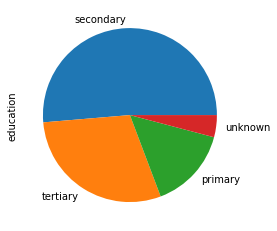

In [37]:
#plot the pie graph of percentage job categories
marketing_data.education.value_counts(normalize=True).plot.pie()
plt.show()

In [38]:
marketing_data.salary.describe()

count     45141.000000
mean      57006.911677
std       32086.873882
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

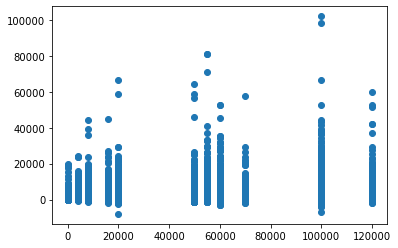

In [39]:
plt.scatter(marketing_data.salary, marketing_data.balance)
plt.show()

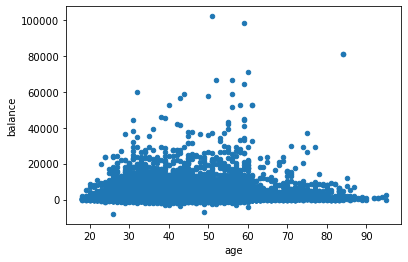

In [40]:
marketing_data.plot.scatter(x='age',y='balance')
plt.show()

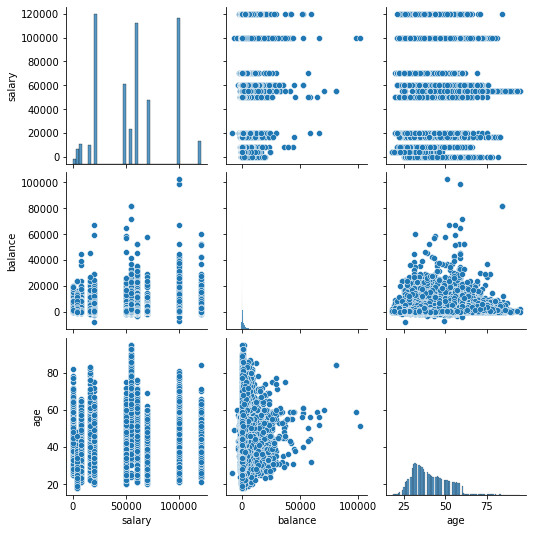

In [41]:
sns.pairplot(data=marketing_data, vars=['salary','balance','age'])
plt.show()

In [42]:
marketing_data[['salary','balance','age']].corr()

,salary,balance,age
salary,1.000000,0.055223,0.024419
balance,0.055223,1.000000,0.097847
age,0.024419,0.097847,1.000000


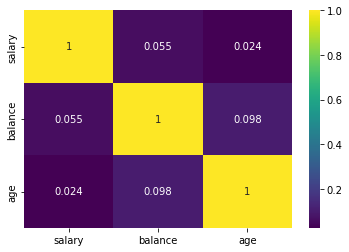

In [43]:
sns.heatmap(marketing_data[['salary','balance','age']].corr(), annot=True,cmap='viridis')
plt.show()

In [44]:
marketing_data.groupby('response')['salary'].mean()

response
no     56771.917052
yes    58770.411063
Name: salary, dtype: float64

In [45]:
marketing_data.groupby('response')['salary'].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

<AxesSubplot:xlabel='response', ylabel='salary'>

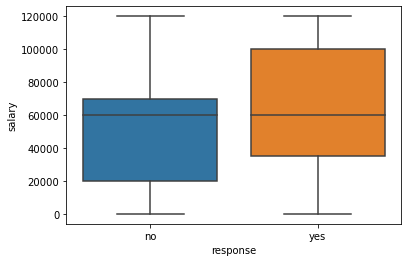

In [46]:
sns.boxplot(x='response', y='salary', data=marketing_data)

In [47]:
marketing_data['response_rate']=np.where(marketing_data.response=='yes',1,0)

In [48]:
marketing_data['response_rate']

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: response_rate, Length: 45141, dtype: int32

In [49]:
marketing_data['response']

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: response, Length: 45141, dtype: object

In [50]:
marketing_data.response_rate.value_counts()

0    39862
1     5279
Name: response_rate, dtype: int64

In [51]:
marketing_data.groupby('marital')['response_rate'].mean()

marital
divorced    0.119277
married     0.101240
single      0.149413
Name: response_rate, dtype: float64

In [52]:
#marketing_data.groupby('marital')['response'].mean()

<AxesSubplot:xlabel='marital'>

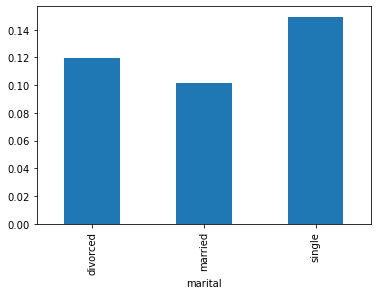

In [53]:
marketing_data.groupby('marital')['response_rate'].mean().plot.bar()

In [54]:
#create pivot table
result = pd.pivot_table(data=marketing_data, index='education', 
columns='marital',values='response_rate')
print(result)


marital    divorced   married    single
education                              
primary    0.138852  0.075616  0.105758
secondary  0.103166  0.094663  0.129349
tertiary   0.137509  0.129661  0.183396
unknown    0.142012  0.122837  0.163188


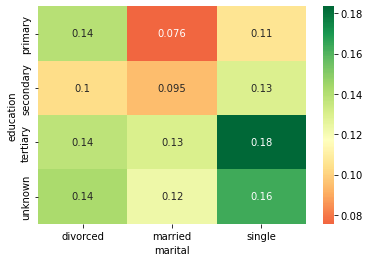

In [55]:
#create heat map of education vs marital vs response_rate
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()


In [56]:
marketing_data['campaign']

0        1
1        1
2        1
3        1
4        1
        ..
45206    3
45207    2
45208    5
45209    4
45210    2
Name: campaign, Length: 45141, dtype: int64

In [57]:
marketing_data['campaign'].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44],
      dtype=int64)

In [58]:
marketing_data['campaign']=np.where(marketing_data.campaign>=3,1,0)

In [59]:
marketing_data['campaign'].unique()

array([0, 1])

In [60]:
marketing_data['campaign']

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    0
45208    1
45209    1
45210    0
Name: campaign, Length: 45141, dtype: int32